# Supervised Learning : Classification

Berikut langkah-langkahnya

In [ ]:
# 1. Import Packages
import sklearn
# Di sini kan mau pakai data Breast Cancer Wisconsin Diagnostic Database. Nah kita import pake scikit-learn's dataset
from sklearn.datasets import load_breast_cancer

In [ ]:
# 2. Load datanya
data = load_breast_cancer()

Beberapa list penting dari dictioanry keys
* Klasifikasi nama label (Target_names)
* Label sebenarnya (Target)
* Atribut atau nama feature (Feature_names)
* Atribut (data)

In [ ]:
nama_label = data['target_names']
labels = data['target']
nama_feature = data['feature_names']
atribut = data['data']

Untuk lebih jelasnya, kita coba print

In [ ]:
print(nama_label)

['malignant' 'benign']


In [ ]:
print(labels[0])

0


In [ ]:
print(nama_feature[0])
print(atribut)

mean radius
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [ ]:
# 3. Atur data ke dalam set
## Kita akan membagi data menjadi 2 bagian, yaitu data training dan data test.
from sklearn.model_selection import train_test_split

In [ ]:
# 4. Bangun model
## Kita akan menggunakan 40% untuk data testing, sehingga data training yang digunakan adalah 60%
train, test, train_labels, test_labels = train_test_split(atribut, labels, test_size = 0.4, random_state = 42)

In [ ]:
# Modelnya akan dicoba pake Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [ ]:
# inisialiasi model
gnb = GaussianNB()

In [ ]:
# latih model dengan menggunakan data
model = gnb.fit(train, train_labels)

In [ ]:
# 5. Evaluasi model dan tingkat akurasinya
preds = gnb.predict(test)
print(preds)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 0 0 1 1 0 1]


0 dan 1 adalah nilai prediksi untuk kelas tumor malignant dan benign.

In [ ]:
# Selanjutnya bandingan dua arrays yang bernama test_labels dan preds, kita dapat melihat akurasinya
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, preds))

0.9517543859649122


Hasilnya menunjukkan bahwa dengan model NaiveBayes classifier diperolwh akurasi sebesar 95.17%.


In [ ]:
# SVM

In [ ]:
# SVM adalah algoritma supervised yang dapat digunakan baik untuk regression atau classification
## Kita akan memakai dataset iris, yang mana ada 3 kelas yang masih-masing 50, dan kelasnya ini merujuk pada tipe dari iris plant
## Ada 4 feature, yaitu sepal lenght, sepal width, petal length, dan petal width.

In [ ]:
# Import Packages
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [ ]:
# Load data
iris = datasets.load_iris()

In [ ]:
# Ambil dua feature pertama
X = iris.data[:, :2]
y = iris.target

In [ ]:
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:,1].max() + 1
h = (x_max - x_min) / 100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Xplot = np.c_[xx.ravel(), yy.ravel()]

In [ ]:
C = 1.0

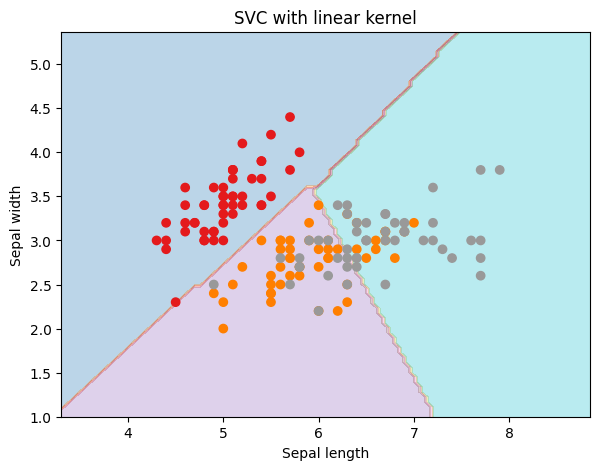

In [ ]:
Svc_classifier = SVC(kernel='linear', C=C, decision_function_shape='ovr').fit(X, y)
Z = Svc_classifier.predict(Xplot)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

In [ ]:
# Logistic Regression
## Import packages
from sklearn import linear_model
import matplotlib.pyplot as plt

In [ ]:
## Load data
X = np.array([[2,4.8], [2.9, 4.7],[2.5, 5],[3.2, 5.5],
 [6, 5],[7.6, 4],
              [3.2, 0.9], [2.9, 1.9],[2.4, 3.5],[0.5, 3.4],[1, 4],[0.9, 5.9]])
y = np.array([0,0,0,1,1,1,2,2,2,3,3,3])

In [ ]:
# Create the logistic regression classifier
Classifier_LR = linear_model.LogisticRegression(solver='liblinear', C = 75)

In [ ]:
# Train the classifier
Classifier_LR.fit(X, y)

LogisticRegression(C=75, solver='liblinear')

In [47]:
# Visualisasi
def Logistic_visualize(Classifier_LR, X, y):
    min_x, max_x, = X[:, 0].min() - 1, X[:, 0].max() + 1
    min_y, max_y, = X[:, 1].min() - 1, X[:, 1].max() + 1
    # tambahan, kita definisikan step size untuk plotting mesh grid
    mesh_step_size = 0.02
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size),np.arange(min_y, max_y, mesh_step_size))
    output = Classifier_LR.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
    output = output.reshape(x_vals.shape)
    plt.figure()
    plt.pcolormesh(x_vals, y_vals, output, cmap =plt.cm.gray)

    plt.scatter(X[:, 0], X[:, 1], c = y, s = 75, edgecolors = 'black', linewidth=1, cmap =plt.cm.Paired)
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))
    plt.show()

Tapi ini itu plotnya di aku tak coba ga muncul, entah lama atau gimana kurang tau.

In [37]:
# DTree
## Import Packages
import pydotplus
from sklearn import tree, model_selection
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report
import collections

In [38]:
X = [[165,19],[175,32],[136,35],[174,65],[141,28],[176,15],[131,32],
[166,6],[128,32],[179,10],[136,34],[186,2],[126,25],[176,28],[112,38],
[169,9],[171,36],[116,25],[196,25]]

Y = ['Man','Woman','Woman','Man','Woman','Man','Woman','Man','Woman',
'Man','Woman','Man','Woman','Woman','Woman','Man','Woman','Woman','Man']
data_feature_names = ['height','length of hair']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y,test_size=0.40,random_state=5)

In [39]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)

In [40]:
prediction = clf.predict([[133,37]])
print(prediction)

['Woman']


In [45]:
dot_data = tree.export_graphviz(clf,feature_names = data_feature_names,
            out_file = None,filled = True,rounded = True)
graph = pydotplus.graph_from_dot_data(dot_data)
colors = ('orange', 'yellow')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()

for i in range(2):
    dest = graph.get_node(str(edges[edge][i]))[0]
    dest.set_fillcolor(colors[i])
graph.write_png('Decisiontree16.png')

True

Cek gambar png di collab mesti muncul kok. Yang ikon file di samping.

In [48]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
import matplotlib.pyplot as plt
import numpy as np

In [51]:
cancer = load_breast_cancer()
X_train, X_test, y_train,y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

In [52]:
forest = RandomForestClassifier(n_estimators = 50, random_state = 0)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=0)

In [53]:
print('Accuracy on the training subset:(:.3f)',format(forest.score(X_train,y_train)))
print('Accuracy on the training subset:(:.3f)',format(forest.score(X_test,y_test)))

Accuracy on the training subset:(:.3f) 1.0
Accuracy on the training subset:(:.3f) 0.965034965034965


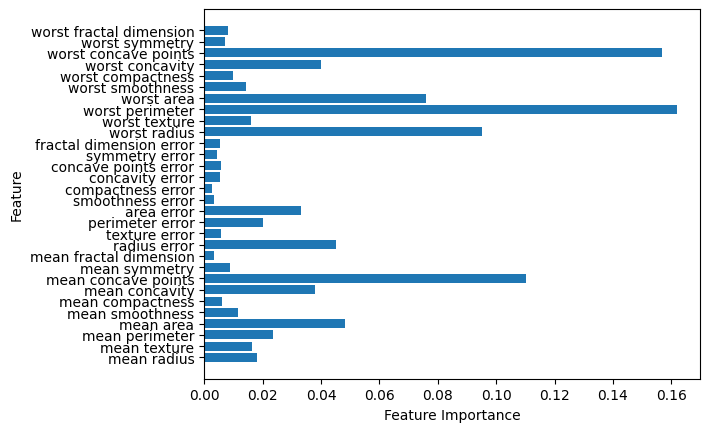

In [54]:
n_features = cancer.data.shape[1]
plt.barh(range(n_features),forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()